<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
<center>Автор материала: Екатерина Ширяева

#  Есть такая либа H20

Согласно исследованиям [Gartner в феврале 2018](https://www.gartner.com/doc/reprints?id=1-4RQ3VEZ&ct=180223&st=sb), H2O занимает уверенное место в лидерах рынка среди DataScience и Machine Learning платформ.
Gartner считают H2O.ai технологическим лидером, эта платформа мспользуется более чем 100000 data scientistами и удоволетверенность клиентами самая высокая (поддержка, обучение и продажи).  
В этом обзоре я хочу показать отличия от реализаций алгоритмов в обычном sklearn

<img src="https://www.gartner.com/resources/326400/326456/326456_0001.png;wa8addaec1755a1f0c?reprintKey=1-4RQ3VEZ" alt="Drawing" style="width: 500px;"/>

### Подготовка данных

Для примера можно взять датасет из [1ой лекции: отток клиентов телекома](https://habrahabr.ru/company/ods/blog/322626/)  

In [103]:
import pandas as pd
import numpy as np

In [104]:
df = pd.read_csv('data/telecom_churn.csv')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


Описание всех признаков можно посмотреть в [1ой лекции](https://habrahabr.ru/company/ods/blog/322626/)  
В качестве предварительной обработки заменю все значения churn на 0/1,   
для International plan и Voice mail plan сделаю замену yes / no на 0 / 1  
а категориальную переменную State пока удалю из обработки (данных недостаточно, чтобы сделать OHE, и укрупнение категорий не стоит в целях этого тьюториала)

In [106]:
d = {'No' : 0, 'Yes' : 1}
df['Churn'] = df['Churn'].apply(lambda x : int(x))
df['International plan'] = df['International plan'].map(d)
df['Voice mail plan'] = df['Voice mail plan'].map(d)
df.drop('State', axis=1, inplace=True)

df.head() 

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Разделим на тест и обучающую выборки

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=42)

Для работы h2o необходимо установить эту библиотеку и запустить

In [ ]:
!pip install h2o

In [151]:
import h2o
import os
h2o.init(nthreads=-1, max_mem_size=8)
# nthreads - количество ядер процессора для вычислений
# max_mem_size - максимальный размер оперативной памяти 

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_161"; Java(TM) SE Runtime Environment (build 1.8.0_161-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from /Users/katya/venv/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/w8/wh9cnmfd7mx5w0mt8yx7xkjh0000gn/T/tmpcc5v4dlf
  JVM stdout: /var/folders/w8/wh9cnmfd7mx5w0mt8yx7xkjh0000gn/T/tmpcc5v4dlf/h2o_katya_started_from_python.out
  JVM stderr: /var/folders/w8/wh9cnmfd7mx5w0mt8yx7xkjh0000gn/T/tmpcc5v4dlf/h2o_katya_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Europe/Moscow
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.4
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_katya_0q1dh1
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


Все данные надо перевести в специальную структуру h2o : H2OFrame  
h2o [поддерживает](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/getting-data-into-h2o.html) большое количество источников, однако у меня не получилось перекодировать csr-матрицу из задания про Элис :)  очень долго висел :)

In [152]:
training = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
validation = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


Посмотрим на структуру (это обязательно надо делать, т.к. не всегда корректно происходит переход форматов) <br>
Здесь будут описаны основные параметры каждой переменной (тип, максимум, минимум, среднее, стандартное отклонение, количество нулевых и пропущенных значений и первые 10 наблюдений)

In [110]:
training.describe()

Rows:2333
Cols:19




,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
type,int,int,int,int,int,real,int,real,real,int,real,real,int,real,real,int,real,int,int
mins,1.0,408.0,0.0,0.0,0.0,2.6,30.0,0.44,0.0,0.0,0.0,23.2,33.0,1.04,0.0,0.0,0.0,0.0,0.0
mean,100.37848264037734,436.71924560651513,0.09515645092156022,0.2726103729104158,8.032576082297462,180.0195027861121,100.62280325760835,30.60383197599656,200.95752250321465,100.05400771538778,17.081633090441525,200.67038148306924,99.94813544792119,9.030210030004287,10.242777539648538,4.444492070295745,2.7660522931847398,1.568795542220319,0.14573510501500214
maxs,232.0,510.0,1.0,1.0,51.0,346.8,165.0,58.96,363.7,170.0,30.91,395.0,175.0,17.77,20.0,18.0,5.4,9.0,1.0
sigma,39.815132404220186,42.11342758508376,0.2934938203721862,0.4453975630897078,13.722524774971957,54.503148533784056,19.89235683817998,9.265512312565042,50.771196810709434,20.081856448464883,4.315580894314363,50.935130537595086,19.586623410722094,2.292113726067487,2.791145550244814,2.4515950038863097,0.7536382712677757,1.3337241215350106,0.35291609524195916
zeros,0,0,2111,1697,1697,0,0,0,1,1,1,0,0,0,13,13,13,493,1993
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,80.0,510.0,0.0,0.0,0.0,202.4,118.0,34.41,260.2,67.0,22.12,177.4,112.0,7.98,9.2,5.0,2.48,3.0,0.0
1,63.0,510.0,0.0,0.0,0.0,132.9,122.0,22.59,67.0,62.0,5.7,160.4,121.0,7.22,9.9,2.0,2.67,3.0,0.0
2,116.0,510.0,0.0,1.0,12.0,221.0,108.0,37.57,151.0,118.0,12.84,179.0,80.0,8.06,9.0,6.0,2.43,2.0,0.0


Зависимая переменная для бинарной классификации должна быть не количественной переменной, а категориальной, преобразуем с помощью метода asfactor()

In [153]:
training['Churn'] = training['Churn'].asfactor()
validation['Churn'] = validation['Churn'].asfactor()

training['International plan'] = training['International plan'].asfactor()
training['Voice mail plan'] = training['Voice mail plan'].asfactor()

validation['International plan'] = validation['International plan'].asfactor()
validation['Voice mail plan'] = validation['Voice mail plan'].asfactor()

### Random Forest

#### sklearn RandomForestClassifier

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [113]:
forest = RandomForestClassifier(n_estimators=800, random_state=152, n_jobs=-1)
forest.fit(X_train, y_train)
print('AUC для sklearn RandomForestClassifier: {:.4f}'.format(roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])))

AUC для sklearn RandomForestClassifier: 0.9404


#### H2ORandomForestEstimator

In [154]:
from h2o.estimators import H2ORandomForestEstimator

необходимо задать список зависимых переменных и предикторов (это будут X и y в коде)

In [155]:
X = training.columns
X.remove('Churn')
y = 'Churn'

rf1 = H2ORandomForestEstimator(model_id='tutorial1', ntrees=800, seed=152)
rf1.train(X, y, training_frame=training, validation_frame=validation)
rf1

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  tutorial1


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.04684101277272021
RMSE: 0.21642784657414169
LogLoss: 0.20074033630931348
Mean Per-Class Error: 0.10923157521914939
AUC: 0.8994753696762197
Gini: 0.7989507393524393
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4256055363321799: 


,0,1,Error,Rate
0,1972.0,21.0,0.0105,(21.0/1993.0)
1,77.0,263.0,0.2265,(77.0/340.0)
Total,2049.0,284.0,0.042,(98.0/2333.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4256055,0.8429487,146.0
max f2,0.2397901,0.8105802,204.0
max f0point5,0.4746598,0.8958924,137.0
max accuracy,0.4256055,0.9579940,146.0
max precision,0.9790575,1.0,0.0
max recall,0.0034502,1.0,397.0
max specificity,0.9790575,1.0,0.0
max absolute_mcc,0.4256055,0.8233476,146.0
max min_per_class_accuracy,0.1664149,0.8470588,235.0
max mean_per_class_accuracy,0.2397901,0.8907684,204.0


Gains/Lift Table: Avg response rate: 14,57 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102872,0.9293375,6.8617647,6.8617647,1.0,1.0,0.0705882,0.0705882,586.1764706,586.1764706
,2,0.0201457,0.8840787,6.8617647,6.8617647,1.0,1.0,0.0676471,0.1382353,586.1764706,586.1764706
,3,0.0300043,0.8429612,6.8617647,6.8617647,1.0,1.0,0.0676471,0.2058824,586.1764706,586.1764706
,4,0.0402915,0.8114106,6.8617647,6.8617647,1.0,1.0,0.0705882,0.2764706,586.1764706,586.1764706
,5,0.0501500,0.7814183,6.8617647,6.8617647,1.0,1.0,0.0676471,0.3441176,586.1764706,586.1764706
,6,0.1003000,0.5665646,6.3925842,6.6271745,0.9316239,0.9658120,0.3205882,0.6647059,539.2584213,562.7174460
,7,0.1500214,0.2865951,2.9576572,5.4109916,0.4310345,0.7885714,0.1470588,0.8117647,195.7657201,441.0991597
,8,0.2001715,0.1805324,0.6451232,4.2169732,0.0940171,0.6145610,0.0323529,0.8441176,-35.4876823,321.6973170
,9,0.3000429,0.1057973,0.1472482,2.8623361,0.0214592,0.4171429,0.0147059,0.8588235,-85.2751830,186.2336134
,10,0.3999143,0.0762791,0.0883489,2.1695826,0.0128755,0.3161844,0.0088235,0.8676471,-91.1651098,116.9582624




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.04181281142387741
RMSE: 0.20448181196350304
LogLoss: 0.17373883641178992
Mean Per-Class Error: 0.07810625780287395
AUC: 0.9416814224282135
Gini: 0.883362844856427
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29251602564007045: 


,0,1,Error,Rate
0,838.0,19.0,0.0222,(19.0/857.0)
1,21.0,122.0,0.1469,(21.0/143.0)
Total,859.0,141.0,0.04,(40.0/1000.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2925160,0.8591549,120.0
max f2,0.2635938,0.8644537,129.0
max f0point5,0.58375,0.8959538,81.0
max accuracy,0.3804167,0.961,108.0
max precision,0.9825,1.0,0.0
max recall,0.0138066,1.0,381.0
max specificity,0.9825,1.0,0.0
max absolute_mcc,0.2925160,0.8358744,120.0
max min_per_class_accuracy,0.1825,0.9090909,164.0
max mean_per_class_accuracy,0.2635938,0.9218937,129.0


Gains/Lift Table: Avg response rate: 14,30 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.011,0.9075,6.9930070,6.9930070,1.0,1.0,0.0769231,0.0769231,599.3006993,599.3006993
,2,0.02,0.8775500,6.9930070,6.9930070,1.0,1.0,0.0629371,0.1398601,599.3006993,599.3006993
,3,0.03,0.8400375,6.9930070,6.9930070,1.0,1.0,0.0699301,0.2097902,599.3006993,599.3006993
,4,0.04,0.7927500,6.9930070,6.9930070,1.0,1.0,0.0699301,0.2797203,599.3006993,599.3006993
,5,0.05,0.7630625,6.9930070,6.9930070,1.0,1.0,0.0699301,0.3496503,599.3006993,599.3006993
,6,0.1,0.5127500,6.4335664,6.7132867,0.92,0.96,0.3216783,0.6713287,543.3566434,571.3286713
,7,0.15,0.2634844,3.9160839,5.7808858,0.56,0.8266667,0.1958042,0.8671329,291.6083916,478.0885781
,8,0.2,0.1755025,0.8391608,4.5454545,0.12,0.65,0.0419580,0.9090909,-16.0839161,354.5454545
,9,0.3,0.1100417,0.1398601,3.0769231,0.02,0.44,0.0139860,0.9230769,-86.0139860,207.6923077
,10,0.4,0.0825485,0.0,2.3076923,0.0,0.33,0.0,0.9230769,-100.0,130.7692308



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2018-04-03 21:56:17,0.048 sec,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-04-03 21:56:17,0.243 sec,1.0,0.3299550,3.7593817,0.8308720,4.0336049,0.1088271,0.3270305,3.6650092,0.7946936,4.3246227,0.107
,2018-04-03 21:56:17,0.312 sec,2.0,0.3199525,3.3116478,0.8127797,4.3355429,0.1018051,0.2733811,1.5744127,0.8568025,6.0808756,0.075
,2018-04-03 21:56:17,0.352 sec,3.0,0.3209383,3.0195030,0.8090340,4.5637209,0.1284884,0.2540667,1.0172508,0.8787240,6.7476383,0.069
,2018-04-03 21:56:18,0.390 sec,4.0,0.3150823,2.7257284,0.8089239,4.7902886,0.1039834,0.2466377,0.8890110,0.8823225,6.9930070,0.062
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2018-04-03 21:56:20,3.102 sec,81.0,0.2222210,0.3934846,0.9033278,6.8617647,0.0467210,0.2056091,0.1763409,0.9384991,6.9930070,0.041
,2018-04-03 21:56:21,3.494 sec,82.0,0.2220493,0.3934773,0.9030393,6.8617647,0.0467210,0.2055255,0.1764233,0.9382910,6.9930070,0.043
,2018-04-03 21:56:21,3.789 sec,83.0,0.2220529,0.3936901,0.9025080,6.8617647,0.0467210,0.2055025,0.1765029,0.9381972,6.9930070,0.044
,2018-04-03 21:56:26,8.561 sec,709.0,0.2169476,0.2007973,0.8998266,6.8617647,0.0424346,0.2045717,0.1738288,0.9413754,6.9930070,0.039



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Total day minutes,20748.4902344,1.0,0.1363729
Total day charge,19548.7832031,0.9421786,0.1284876
Customer service calls,19157.3359375,0.9233123,0.1259148
International plan,14547.7001953,0.7011450,0.0956172
Total eve charge,9294.6621094,0.4479681,0.0610907
Total eve minutes,9159.7636719,0.4414665,0.0602041
Total intl calls,8102.6518555,0.3905177,0.0532560
Total intl minutes,6614.3745117,0.3187882,0.0434741
Total intl charge,6516.2104492,0.3140571,0.0428289
Total night charge,5165.4580078,0.2489558,0.0339508


Получился большой вывод информации о модели.  
Сразу следует обратить внимание на AUC при тех же заданных параметрах (ntrees=800)  

In [116]:
print(rf1.auc(valid=True))

0.9416814224282135


Вся информация идет сначала об обучающей, потом о валидационной выборке
* Отображаются все метрики (MSE, RMSE, LogLoss, AUC, Gini и т.д.)
* Строится матрица ошибок (confusion matrix), которая приводится для порогового значения спрогнозированной вероятности события, оптимального с точки зрения F1-меры _(для справки : F1- мера = 2 x точность x полнота/(точность + полнота))_
* _Maximum Metrics:_ Рассчитываются на ней различные метрики и соответствующие пороговые значения
* _Gains/Lift Table:_ Таблица выигрышей создается путем разбиения данных на группы по квантильным пороговым значениям спрогнозированной верроятности положительного класса
* _Variable Importances:_ Информация о важностях предикторов. Информация выводится также в отмасштабированном и процентном видах. На сайте с документацией указано, что важность рассчитывается, как относительное влияние каждой переменной: была ли переменная выбрана при построении дерева и на как изменилась среднеквадратичная ошибка (рассчитывается на всех деревьях)

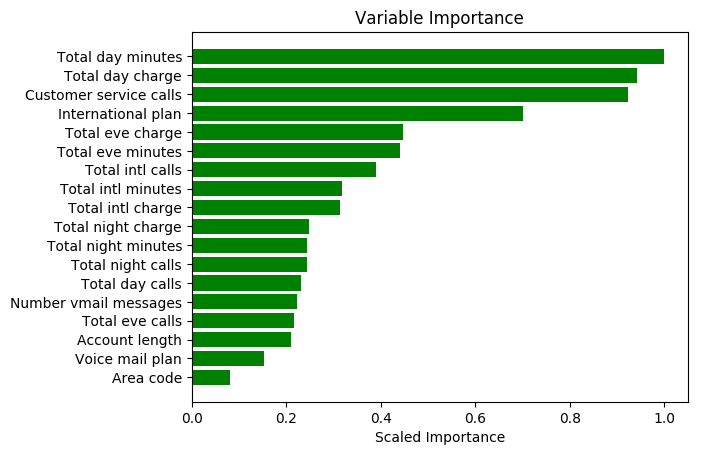

In [129]:
# можно нарисовать графиком 
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = rf1._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = rf1._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

___Описание параметров вызова функции___  
1. Параметры, определяющие задачу  
    * __model_id:__ идентификатор модели
    * __training_frame:__ датасет для построения модели
    * __validation_frame:__ датасет для валидации
    * __nfolds:__ количество фолдов для кросс-валидации (по умолчанию 0)
    * __y:__ имена зависимой переменной
    * __x:__ список названий предикторов
    * __seed:__ random state <br><br>
2. Параметры, задающие сложность дерева
    * __ntrees__: количество деревьев
    * __max_depth:__  максимальная глубина дерева
    * __min_rows:__ минимальное количество наблюдений в терминальном листе
 <br><br>
3. Параметры, определяющие формирование подвыборок
    * __mtries:__ количество случайно отбираемых предикторов для разбиения узла. По умолчанию -1: для классификации корень квадратный из р, для регрессии р / 3, где р - количество предикторов
    * __sample_rate:__ какую часть строк отбирать (от 0 до 1). По умолчанию 0.6320000291 
    * __sample_rate_per_class:__ для построения модели из несбалансированного набора данных. Какую часть строк выбирать для каждого дерева (от 0 до 1) 
    * __col_sample_rate_per_tree:__ какую часть столбцов выбирать для каждого дерева (от 0 до 1, по умоланчанию 1)
    * __col_sample_rate_change_per_level:__ задает изменение отбора столбцов для каждого уровня дерева (от 0 до 2, по умолчанию 1), например: (factor = col_sample_rate_change_per_level)
        * level 1: col_sample_rate
        * level 2: col_sample_rate * factor
        * level 3: col_sample_rate * factor^2
        * level 4: col_sample_rate * factor^3
 <br><br>
4. Параметры, определяющие биннинг переменных
    * __nbins__: (Numerical/real/int only) для каждой переменной строит по крайней мере n интервалов и затем рабивает по наилучшей точке расщепления
    * __nbins_top_level:__  (Numerical/real/int only) определяет максимальное количество интервалов n на вершине дерева. При переходе на увроень ниже делит заданное число на 2 до тех пор, пока не дойдет до уровня nbins 
    * __nbins_cats:__ (Categorical/enums only) каждая переменная может быть разбита максимум на n интерваловю. Более высокие значения могут привести к переобучению.
    * __categorical_encoding:__ схема кодировки для категориальных переменных
        * auto: используется схема enum.
        * enum: 1 столбец для каждого категориального признака (как есть)
        * one_hot_explicit: N+1 новых столбцов для каждого признака с N уровнями
        * binary: не более 32 столбцов для признака (используется хеширование)
        * eigen: выполняет one-hot-encoding и оставляет k главных компонент
        * label_encoder: все категории сортируются в лексикографическом порядке и каждому уровню присваивается целое число, начиная с 0 (например, level 0 -> 0, level 1 -> 1,  и т.д.)
        * sort_by_response: все категории сортируются по среднему значению переменной и каждому уровню присваивается значение (например, для уровня с мин средним ответом -> 0, вторым наименьшим -> 1, и т.д.). 
    * __histogram_type:__ тип гистограммы для поиска оптимальных расщепляющих значений
        * AUTO = UniformAdaptive
        * UniformAdaptive: задаются интервалы одинаковой ширины (max-min)/N
        * QuantilesGlobal: интервалы одинаквого размера (в каждом интервале одинаковое количество наблюдений)
        * Random: задает построение Extremely Randomized Trees (XRT). Случайным образом отбирается N-1 точка расщепления и затем выбирается наилучшее разбиение
        * RoundRobin: все типы гистограмм (по одному на каждое дерево) перебираются по кругу 
 <br><br>
5. Параметры остановки
    * __stopping_rounds:__ задает количество шагов в течение которого должно произойти заданное улучшение(stopping_tolerance:) для заданной метрики (stopping_metric) 
    * __stopping_metric:__  метрика для ранней остановки (по умолчанию логлосс для классификации и дисперсия - для регрессии). Возможные значения: deviance, logloss, mse, rmse, mae, rmsle, auc, lift_top_group, misclassification, mean_per_class_error
    * __stopping_tolerance:__ относительное улучшение для остановки обучения (если меньше, то остановка)

  
  
  
Полный список всех параметров с описанием можно найти на сайте с [официальной документацией](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/drf.html)

И в завершение этой части сделаем подбор параметров и попытаемся улучшить модель по разным параметрам

In [156]:
from h2o.grid.grid_search import H2OGridSearch

In [201]:
rf_params = {'max_depth': [10, 14, 18, 24]}

rf_grid = H2OGridSearch(model=H2ORandomForestEstimator(ntrees=800, seed=152),
                          grid_id='rf_grid_max_depth',
                          hyper_params=rf_params)
rf_grid.train(X, y, training_frame=training, validation_frame=validation)

# модели, отсортированные по AUC
rf_gridperf = rf_grid.get_grid(sort_by='auc', decreasing=True)
print(rf_gridperf)

# выберем лучшую модель и выведем AUC на тесте 
best_rf = rf_gridperf.models[0]
print(best_rf.auc(valid=True))
print(rf_gridperf.get_hyperparams(0))

drf Grid Build progress: |████████████████████████████████████████████████| 100%
    max_depth                  model_ids                 auc
0          14  rf_grid_max_depth_model_1  0.9433909148028168
1          18  rf_grid_max_depth_model_2  0.9421669345823371
2          10  rf_grid_max_depth_model_0  0.9416895822963501
3          24  rf_grid_max_depth_model_3  0.9414692658566638

0.9433909148028168
Hyperparameters: [max_depth]
[14]


In [207]:
rf_params1 = {'mtries': [3, 5, 7, 9]}

rf_grid1 = H2OGridSearch(model=H2ORandomForestEstimator(ntrees=800, seed=152, max_depth=14),
                          grid_id='rf_grid_mtries1',
                          hyper_params=rf_params1)
rf_grid1.train(X, y, training_frame=training, validation_frame=validation)

# модели, отсортированные по AUC
rf_gridperf1 = rf_grid1.get_grid(sort_by='auc', decreasing=True)
print(rf_gridperf1)

# выберем лучшую модель и выведем AUC на тесте 
best_rf1 = rf_gridperf1.models[0]
print(best_rf1.auc(valid=True))
print(rf_gridperf1.get_hyperparams(0))

drf Grid Build progress: |████████████████████████████████████████████████| 100%
    mtries                model_ids                 auc
0        7  rf_grid_mtries1_model_2  0.9422444533296342
1        5  rf_grid_mtries1_model_1  0.9417263017029645
2        3  rf_grid_mtries1_model_0  0.9406940783836933
3        9  rf_grid_mtries1_model_3  0.9390417050860458

0.9422444533296342
Hyperparameters: [mtries]
[7]


теперь к настройке более специфических параметров

In [211]:
rf_params2 = {'histogram_type': ['UniformAdaptive', 'Random', 'QuantilesGlobal', 'RoundRobin']}

rf_grid2 = H2OGridSearch(model=H2ORandomForestEstimator(ntrees=800, seed=152, max_depth=14, mtries=7),
                          grid_id='rf_grid_hist_type',
                          hyper_params=rf_params2)
rf_grid2.train(X, y, training_frame=training, validation_frame=validation)

# модели, отсортированные по AUC
rf_gridperf2 = rf_grid2.get_grid(sort_by='auc', decreasing=True)
print(rf_gridperf2)

# выберем лучшую модель и выведем AUC на тесте 
best_rf2 = rf_gridperf2.models[0]
print('AUC for the best model: ', best_rf2.auc(valid=True))
print(rf_gridperf2.get_hyperparams(0))

drf Grid Build progress: |████████████████████████████████████████████████| 100%
      histogram_type                  model_ids                 auc
0         RoundRobin  rf_grid_hist_type_model_3  0.9433868348687484
1    UniformAdaptive  rf_grid_hist_type_model_0  0.9422444533296342
2             Random  rf_grid_hist_type_model_1  0.9391192238333429
3    QuantilesGlobal  rf_grid_hist_type_model_2  0.9380339613711842

AUC for the best model:  0.9433868348687484
Hyperparameters: [histogram_type]
['RoundRobin']


По типу гистограммы RoundRobin оказался самым оптимальным

In [212]:
rf_params3 = {'col_sample_rate_per_tree': [0.5, 0.6, 0.7, 0.8, 0.9], 
             'sample_rate': [0.5, 0.6, 0.7, 0.8, 0.9] }

rf_grid3 = H2OGridSearch(model=H2ORandomForestEstimator(ntrees=800, seed=152, max_depth=14, mtries=7,
                                                       histogram_type='RoundRobin'),
                          grid_id='rf_grid3',
                          hyper_params=rf_params3)
rf_grid3.train(X, y, training_frame=training, validation_frame=validation)

# модели, отсортированные по AUC
rf_gridperf3 = rf_grid3.get_grid(sort_by='auc', decreasing=True)
print(rf_gridperf3)

# выберем лучшую модель и выведем AUC на тесте 
best_rf3 = rf_gridperf3.models[0]
print('AUC for the best model: ', best_rf3.auc(valid=True))
print(rf_gridperf3.get_hyperparams(0))

drf Grid Build progress: |████████████████████████████████████████████████| 100%
     col_sample_rate_per_tree sample_rate          model_ids  \
0                         0.9         0.6   rf_grid3_model_9   
1                         0.7         0.7  rf_grid3_model_12   
2                         0.9         0.7  rf_grid3_model_14   
3                         0.7         0.5   rf_grid3_model_2   
4                         0.8         0.6   rf_grid3_model_8   
5                         0.9         0.8  rf_grid3_model_19   
6                         0.9         0.9  rf_grid3_model_24   
7                         0.9         0.5   rf_grid3_model_4   
8                         0.8         0.5   rf_grid3_model_3   
9                         0.6         0.5   rf_grid3_model_1   
10                        0.7         0.6   rf_grid3_model_7   
11                        0.7         0.8  rf_grid3_model_17   
12                        0.8         0.7  rf_grid3_model_13   
13                     

### Logistic Regression

#### sklearn LogisticRegression

In [213]:
from sklearn.linear_model import LogisticRegression

In [214]:
logreg = LogisticRegression().fit(X_train, y_train)
print('AUC для sklearn LogisticRegression: {:.4f}'.format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC для sklearn LogisticRegression: 0.8271


проверим на отмасштабированных данных

In [215]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression().fit(X_train_scaled, y_train)
print('AUC для sklearn LogisticRegression Scaled: {:.4f}'.format(
    roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])))


AUC для sklearn LogisticRegression Scaled: 0.8283


результаты хуже, чем в лесу  
займемся подбором параметров в H2O

#### H2OGeneralizedLinearEstimator

In [216]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [217]:
# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", seed=1000000)
# обучаем модель
glm_model.train(X, y, training_frame= training, validation_frame=validation)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [218]:
glm_model.model_performance().show()


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.09918009133349871
RMSE: 0.3149287083349162
LogLoss: 0.3263867097273659
Null degrees of freedom: 2332
Residual degrees of freedom: 2312
Null deviance: 1937.5065769088035
Residual deviance: 1522.9203875878893
AIC: 1564.9203875878893
AUC: 0.8190335291166141
Gini: 0.6380670582332282
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24799189912357045: 


,0,1,Error,Rate
0,1773.0,220.0,0.1104,(220.0/1993.0)
1,149.0,191.0,0.4382,(149.0/340.0)
Total,1922.0,411.0,0.1582,(369.0/2333.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2479919,0.5086551,178.0
max f2,0.1228917,0.6103074,263.0
max f0point5,0.3054631,0.5099502,150.0
max accuracy,0.6080174,0.8649807,47.0
max precision,0.9870110,1.0,0.0
max recall,0.0069831,1.0,396.0
max specificity,0.9870110,1.0,0.0
max absolute_mcc,0.2479919,0.4180577,178.0
max min_per_class_accuracy,0.1400732,0.75,248.0
max mean_per_class_accuracy,0.1557006,0.7547866,237.0


Gains/Lift Table: Avg response rate: 14,57 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102872,0.7456359,5.4322304,5.4322304,0.7916667,0.7916667,0.0558824,0.0558824,443.2230392,443.2230392
,2,0.0201457,0.6584274,4.1767263,4.8178348,0.6086957,0.7021277,0.0411765,0.0970588,317.6726343,381.7834793
,3,0.0300043,0.5984535,4.1767263,4.6071849,0.6086957,0.6714286,0.0411765,0.1382353,317.6726343,360.7184874
,4,0.0402915,0.5507832,2.8590686,4.1608573,0.4166667,0.6063830,0.0294118,0.1676471,185.9068627,316.0857322
,5,0.0501500,0.5157454,2.9833760,3.9293866,0.4347826,0.5726496,0.0294118,0.1970588,198.3375959,292.9386626
,6,0.1003000,0.3692585,3.1083208,3.5188537,0.4529915,0.5128205,0.1558824,0.3529412,210.8320764,251.8853695
,7,0.1500214,0.2860657,2.9576572,3.3328571,0.4310345,0.4857143,0.1470588,0.5,195.7657201,233.2857143
,8,0.2001715,0.2245553,1.7594268,2.9386573,0.2564103,0.4282655,0.0882353,0.5882353,75.9426848,193.8657262
,9,0.3000429,0.1520522,1.4430321,2.4408277,0.2103004,0.3557143,0.1441176,0.7323529,44.3032063,144.0827731
,10,0.3999143,0.1133559,0.8540394,2.0445558,0.1244635,0.2979636,0.0852941,0.8176471,-14.5960616,104.4555829


In [219]:
str(glm_model.model_performance().auc())

'0.8190335291166141'

___Описание параметров вызова функции___  
1. Параметры, определяющие задачу  
    * __model_id:__ идентификатор 
    * __training_frame:__ датасет для построения модели
    * __validation_frame:__ датасет для валидации
    * __nfolds:__ количество фолдов для кросс-валидации (по умолчанию 0)
    * __y:__ имена зависимой переменной
    * __x:__ список названий предикторов
    * __seed:__ random state 
    * __family:__ тип модели (gaussian, binomial, multinomial, ordinal, quasibinomial, poisson, gamma, tweedie   
    * __solver:__ 
        * IRLSM: Iteratively Reweighted Least Squares Method - используется с небольшим количеством предикторов и для l1-регулярзации
        * L_BFGS: Limited-memory Broyden-Fletcher-Goldfarb-Shanno algorithm - используется для данных в большим числом колонок
        * COORDINATE_DESCENT, COORDINATE_DESCENT_NAIVE - экспериментальные
        * AUTO: Sets the solver based on given data and parameters (default)
        * GRADIENT_DESCENT_LH, GRADIENT_DESCENT_SQERR: используется только для family=Ordinal<br><br>
2. Параметры, определяющие регуляризацию   
для справки формула ElasticNet, объединяющая $L_1$ и $L_2$ регуляризацию
$$\large \begin{array}{rcl}
L &=& -\mathcal{L} + \lambda R\left(\textbf W\right) \\
&=& -\mathcal{L} + \lambda \left(\alpha \sum_{k=1}^K\sum_{i=1}^M w_{ki}^2 + \left(1 - \alpha\right) \sum_{k=1}^K\sum_{i=1}^M \left|w_{ki}\right| \right)
\end{array}$$ где $\alpha \in \left[0, 1\right]$

    * __alpha:__  распределение между $L_1$ и $L_2$ регуляризацией. (1 - $L_1$, 0 - $L_2$)
    * __lambda:__ сила регуляризации
    * __lambda_search:__ True / False. Определяет стоит ли начинать поиск $\lambda$, начиная с максимального значения
    * __lambda_min_ratio:__ минимальное значение $\lambda$, используемое при поиске $\lambda$
    * __nlambdas:__ количество шагов при поиске $\lambda$ (по умолчанию 100)
 <br><br>
3. Параметры, влияющие на предобработку предикторов
    * __standardize:__ использовать ли масштабирование
    * __missing_values_handling:__ как работать с пропцщенными значениями (пропускать или испутировать средним)
    * __remove_collinear_columns:__ удалять ли автоматически коллинеарные столбцы при построении модели 
    * __interactions:__ список колонок, из которых буду составлены все возможные пары и использованы для построения модели 
    * __interaction_pairs:__ список уже готовых пар для модели 
 <br><br>

Полный список всех параметров с описанием можно найти на сайте с [официальной документацией](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html)

In [223]:
hyper_parameters = {'alpha': np.arange(0, 1.05, 0.05).tolist()}

gridsearch = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', lambda_search=True, standardize=True),
                           grid_id="gridresults", hyper_params=hyper_parameters)
gridsearch.train(X, y, training_frame= training, validation_frame=validation)

gridperf = gridsearch.get_grid(sort_by="auc", decreasing=True)
best_model = gridperf.models[0]
print(gridperf)

print('AUC for the best model: ', best_model.auc(valid=True))
print(best_model.summary()['regularization'])

glm Grid Build progress: |████████████████████████████████████████████████| 100%
                      alpha             model_ids                 auc
0                     [0.0]   gridresults_model_0  0.8284550921657106
1                     [1.0]  gridresults_model_20  0.8283938931546866
2      [0.9500000000000001]  gridresults_model_19  0.8283490138799356
3                     [0.9]  gridresults_model_18  0.8282755750667069
4      [0.8500000000000001]  gridresults_model_17  0.8282388556600926
5                     [0.8]  gridresults_model_16  0.8282347757260242
6      [0.7000000000000001]  gridresults_model_14  0.8282102961216147
7                    [0.75]  gridresults_model_15   0.828202136253478
8                    [0.65]  gridresults_model_13  0.8281613369127955
9      [0.6000000000000001]  gridresults_model_12  0.8280185392204062
10                   [0.55]  gridresults_model_11  0.8278186224510612
11                    [0.5]  gridresults_model_10   0.827785982978515
12       

### Gradient Boosting

#### sklearn GradientBoostingClassifier


In [224]:
from sklearn.ensemble import GradientBoostingClassifier

In [225]:
grb = GradientBoostingClassifier().fit(X_train, y_train)
print('AUC для sklearn GradientBoostingClassifier: {:.4f}'.format(
    roc_auc_score(y_test, grb.predict_proba(X_test)[:, 1])))

AUC для sklearn GradientBoostingClassifier: 0.9357


#### Gradient Boosting Machine

In [226]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [232]:
gbm = H2OGradientBoostingEstimator(ntrees = 800, learn_rate = 0.1,seed = 1234)
gbm.train(X, y, training_frame= training, validation_frame=validation)
gbm.model_performance().show()

gbm Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 4.97643761962381e-09
RMSE: 7.05438701775272e-05
LogLoss: 2.387073099550759e-05
Mean Per-Class Error: 0.0
AUC: 1.0
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9991932827883621: 


,0,1,Error,Rate
0,1993.0,0.0,0.0,(0.0/1993.0)
1,0.0,340.0,0.0,(0.0/340.0)
Total,1993.0,340.0,0.0,(0.0/2333.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9991933,1.0,158.0
max f2,0.9991933,1.0,158.0
max f0point5,0.9991933,1.0,158.0
max accuracy,0.9991933,1.0,158.0
max precision,1.0000000,1.0,0.0
max recall,0.9991933,1.0,158.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.9991933,1.0,158.0
max min_per_class_accuracy,0.9991933,1.0,158.0
max mean_per_class_accuracy,0.9991933,1.0,158.0


Gains/Lift Table: Avg response rate: 14,57 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102872,0.9999999,6.8617647,6.8617647,1.0,1.0,0.0705882,0.0705882,586.1764706,586.1764706
,2,0.0201457,0.9999990,6.8617647,6.8617647,1.0,1.0,0.0676471,0.1382353,586.1764706,586.1764706
,3,0.0300043,0.9999975,6.8617647,6.8617647,1.0,1.0,0.0676471,0.2058824,586.1764706,586.1764706
,4,0.0402915,0.9999958,6.8617647,6.8617647,1.0,1.0,0.0705882,0.2764706,586.1764706,586.1764706
,5,0.0501500,0.9999929,6.8617647,6.8617647,1.0,1.0,0.0676471,0.3441176,586.1764706,586.1764706
,6,0.1003000,0.9999602,6.8617647,6.8617647,1.0,1.0,0.3441176,0.6882353,586.1764706,586.1764706
,7,0.1500214,0.0001398,6.2702333,6.6657143,0.9137931,0.9714286,0.3117647,1.0,527.0233266,566.5714286
,8,0.2001715,0.0000579,0.0,4.9957173,0.0,0.7280514,0.0,1.0,-100.0,399.5717345
,9,0.3000429,0.0000241,0.0,3.3328571,0.0,0.4857143,0.0,1.0,-100.0,233.2857143
,10,0.3999143,0.0000117,0.0,2.5005359,0.0,0.3644159,0.0,1.0,-100.0,150.0535906


In [237]:
print('AUC на валидационной выборке: ',gbm.auc(valid=True))

AUC на валидационной выборке:  0.9146600190940914


___Описание параметров вызова функции___  
только специфические, отличаюшиеся от RandomForest
1. Параметры для GBM
    * __learn_rate:__ скорость обучения (от 0 до 1)
    * __learn_rate_annealing:__ уменьшает скорость обучения после построения каждого дерева
    
Для настройки параметров бустинга есть следующие советы от экспертов (Марк Лэндри, Дмитрий Ларько и [github](https://github.com/h2oai/h2o-3/blob/master/h2o-docs/src/product/tutorials/gbm/gbmTuning.ipynb)): 
* заификисровать количество деревьев константой, подобрать leraning rate (например, learn_rate=0.02, learn_rate_annealing=0.995) 
* в самом конце можно снова вернуться к настройке количества деревьев
* потом необходимо настроить глубину деревьев (max_depth) (чаще всего это 4-10)
* попробовать изменить тип гистрограммы, nbins/nbins_cat
* изменить настройки, определяющие подвыборки (sample_rate, col_sample_rate), чаще всего это 70-80%
* для несбалансированных наборов необходимо настроить параметры, отвечающие за баланс классов (sample_rate_per_class)
* определить критерии остановки 

начинаем настройку

In [239]:
gbm_params = {'learn_rate': [0.0001, 0.001, 0.01, 0.1, 1]}

gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator(ntrees = 800, seed = 1234),
                          grid_id='gbm_grid_learn_rate',
                          hyper_params=gbm_params)
gbm_grid.train(X, y, training_frame=training, validation_frame=validation)

# модели, отсортированные по AUC
gbm_gridperf = gbm_grid.get_grid(sort_by='auc', decreasing=True)
print(gbm_gridperf)

# выберем лучшую модель и выведем AUC на тесте 
best_gbm = gbm_gridperf.models[0]
print(best_gbm.auc(valid=True))
print(gbm_gridperf.get_hyperparams(0))

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
    learn_rate                    model_ids                 auc
0        0.001  gbm_grid_learn_rate_model_1  0.9319711793457418
1         0.01  gbm_grid_learn_rate_model_2  0.9310858336529282
2          1.0  gbm_grid_learn_rate_model_4  0.9299924113226331
3       1.0E-4  gbm_grid_learn_rate_model_0  0.9189194702613606
4          0.1  gbm_grid_learn_rate_model_3  0.9146600190940914

0.9319711793457418
Hyperparameters: [learn_rate]
[0.001]


In [240]:
gbm_params1 = {'max_depth': [4, 6, 8, 10]}

gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator(ntrees = 800, seed = 1234, learn_rate=0.001),
                          grid_id='gbm_grid_max_depth',
                          hyper_params=gbm_params1)
gbm_grid1.train(X, y, training_frame=training, validation_frame=validation)

# модели, отсортированные по AUC
gbm_gridperf1 = gbm_grid1.get_grid(sort_by='auc', decreasing=True)
print(gbm_gridperf1)

# выберем лучшую модель и выведем AUC на тесте 
best_gbm1 = gbm_gridperf1.models[0]
print(best_gbm1.auc(valid=True))
print(gbm_gridperf1.get_hyperparams(0))

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
    max_depth                   model_ids                 auc
0           6  gbm_grid_max_depth_model_1  0.9400943280756583
1           8  gbm_grid_max_depth_model_2  0.9301229692128176
2          10  gbm_grid_max_depth_model_3  0.9272466156946904
3           4  gbm_grid_max_depth_model_0  0.9173772551835563

0.9400943280756583
Hyperparameters: [max_depth]
[6]


In [242]:
gbm_params2 = {'nbins': [2, 8, 16, 32],
               'histogram_type': ['UniformAdaptive', 'Random', 'QuantilesGlobal', 'RoundRobin']}

gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator(ntrees = 800, seed = 1234, 
                                                             max_depth=6, learn_rate=0.001),
                          grid_id='gbm_grid_hist',
                          hyper_params=gbm_params2)
gbm_grid2.train(X, y, training_frame=training, validation_frame=validation)

# модели, отсортированные по AUC
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)
print(gbm_gridperf2)

# выберем лучшую модель и выведем AUC на тесте 
best_gbm2 = gbm_gridperf2.models[0]
print(best_gbm2.auc(valid=True))
print(gbm_gridperf2.get_hyperparams(0))

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
       histogram_type nbins               model_ids                 auc
0          RoundRobin    16  gbm_grid_hist_model_11  0.9450596078367374
1          RoundRobin     8   gbm_grid_hist_model_7  0.9447291331772079
2          RoundRobin    32  gbm_grid_hist_model_15  0.9445985752870233
3     UniformAdaptive    32  gbm_grid_hist_model_12   0.943439874011636
4     UniformAdaptive     8   gbm_grid_hist_model_4  0.9427993243629184
5     UniformAdaptive    16   gbm_grid_hist_model_8  0.9425912477254368
6              Random    16   gbm_grid_hist_model_9  0.9421424549779276
7              Random    32  gbm_grid_hist_model_13  0.9394864178994867
8              Random     8   gbm_grid_hist_model_5  0.9377973251952249
9     QuantilesGlobal    32  gbm_grid_hist_model_14  0.9370343775244592
10    QuantilesGlobal    16  gbm_grid_hist_model_10  0.9347373746440257
11    QuantilesGlobal     8   gbm_grid_hist_model_6  0.

В итоге AUC = 0.9450 на валидационной выборке получился немного выше для GradientBoostingMachine, чем для RandomForestClassifier AUC = 0.941686

#### XGBoost

Еще одним из алгоритмов, доступных в H20, из семейства Gradient Boosting Machine является XGBoost. Эта библиотека - очень популярный инструмент для решения Kaggle-задач. Он позволяет строить деервья параллельно, что позволяет решать проблемы скорости обучения. 

__Особенности модели__

Реализация модели поддерживает особенности реализации scikit-learn и R с новыми дополнениями, такими как регуляризация. Поддерживаются три основные формы повышения градиента:

* Алгоритм Gradient Boosting также называется градиентной машиной повышения, включая скорость обучения.
* Stochastic Gradient Boosting с суб-выборкой в строке, столбце и столбце на каждый уровень разделения.
* Регулярное усиление градиента с регуляцией L1 и L2.

__Системные функции__

Библиотека предоставляет систему для использования в различных вычислительных средах, не в последнюю очередь:

* Параллелизация построения дерева с использованием всех ваших ядер процессора во время обучения.
* Распределенные вычисления для обучения очень крупных моделей с использованием кластера машин.
* Внекорпоративные вычисления для очень больших наборов данных, которые не вписываются в память.
* Кэш Оптимизация структуры данных и алгоритма для наилучшего использования аппаратного обеспечения.

__Особенности алгоритма__

Реализация алгоритма была разработана для эффективности вычислительных ресурсов времени и памяти. Цель проекта заключалась в том, чтобы наилучшим образом использовать имеющиеся ресурсы для обучения модели. Некоторые ключевые функции реализации алгоритма включают:

* Редкая реализация Aware с автоматической обработкой отсутствующих значений данных.
* Блочная структура для поддержки распараллеливания конструкции дерева.
* Продолжение обучения, чтобы вы могли еще больше повысить уже установленную модель для новых данных. 

В реальности в H2O используется нативный алгоритм [XGBoost](http://xgboost.readthedocs.io/en/latest/get_started/index.html), поэтому не буду пытатьтся подобрать параметры, покажу только, как запускается

In [246]:
from h2o.estimators import H2OXGBoostEstimator
# библиотека доступна не для всех платформ, сначала надо проверить ее доступность
is_xgboost_available = H2OXGBoostEstimator.available()
print(is_xgboost_available)

True


In [249]:
param = {
      "ntrees" : 100
    , "max_depth" : 10
    , "learn_rate" : 0.02
    , "sample_rate" : 0.7
    , "col_sample_rate_per_tree" : 0.9
    , "min_rows" : 5
    , "seed": 4241
    , "score_tree_interval": 100
}

model = H2OXGBoostEstimator(**param)
model.train(X, y, training_frame=training, validation_frame=validation)
model.model_performance().show()

print('AUC на валидационной выборке GradientBoostingMachine: ',gbm.auc(valid=True))
print('AUC на валидационной выборке XGBoost: ',model.auc(valid=True))

xgboost Model Build progress: |███████████████████████████████████████████| 100%

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.04233021547018061
RMSE: 0.2057430812206831
LogLoss: 0.1893648656423194
Mean Per-Class Error: 0.0834117942209498
AUC: 0.9795984475074526
Gini: 0.9591968950149052
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38141971826553345: 


,0,1,Error,Rate
0,1960.0,33.0,0.0166,(33.0/1993.0)
1,65.0,275.0,0.1912,(65.0/340.0)
Total,2025.0,308.0,0.042,(98.0/2333.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3814197,0.8487654,163.0
max f2,0.1430533,0.8405723,274.0
max f0point5,0.6040332,0.9194529,118.0
max accuracy,0.4644568,0.9597085,143.0
max precision,0.9170414,1.0,0.0
max recall,0.1096087,1.0,316.0
max specificity,0.9170414,1.0,0.0
max absolute_mcc,0.4626352,0.8304986,144.0
max min_per_class_accuracy,0.1715132,0.8966382,251.0
max mean_per_class_accuracy,0.1430533,0.9165882,274.0


Gains/Lift Table: Avg response rate: 14,57 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102872,0.8952582,6.8617647,6.8617647,1.0,1.0,0.0705882,0.0705882,586.1764706,586.1764706
,2,0.0201457,0.8631429,6.8617647,6.8617647,1.0,1.0,0.0676471,0.1382353,586.1764706,586.1764706
,3,0.0300043,0.8510975,6.8617647,6.8617647,1.0,1.0,0.0676471,0.2058824,586.1764706,586.1764706
,4,0.0402915,0.8373678,6.8617647,6.8617647,1.0,1.0,0.0705882,0.2764706,586.1764706,586.1764706
,5,0.0501500,0.8046734,6.8617647,6.8617647,1.0,1.0,0.0676471,0.3441176,586.1764706,586.1764706
,6,0.1003000,0.6370200,6.8031171,6.8324409,0.9914530,0.9957265,0.3411765,0.6852941,580.3117144,583.2440925
,7,0.1500214,0.2845466,3.0759635,5.5874370,0.4482759,0.8142857,0.1529412,0.8382353,207.5963489,458.7436975
,8,0.2001715,0.1906352,0.5864756,4.3345195,0.0854701,0.6316916,0.0294118,0.8676471,-41.3524384,333.4519461
,9,0.3000429,0.1235101,1.1779854,3.2838445,0.1716738,0.4785714,0.1176471,0.9852941,17.7985357,228.3844538
,10,0.3999143,0.1064968,0.1472482,2.5005359,0.0214592,0.3644159,0.0147059,1.0,-85.2751830,150.0535906



AUC на валидационной выборке GradientBoostingMachine:  0.9146600190940914
AUC на валидационной выборке XGBoost:  0.9335786733686384


#### LightGBM

[LightGBM](https://github.com/Microsoft/LightGBM) строит глубокие асимметричные деревья, повторно разбивая один лист вместо разбиения всех листьев одного уровня до достижения максимальной глубины. H2O не интегрирован с LightGBM, но предоставляет метод для эмуляции LightGBM алгоритма, используя определенный набор параметров:

tree_method="hist"
grow_policy="lossguide"

In [150]:
h2o.cluster().shutdown()


H2O session _sid_addf closed.


Список литературы 

https://www.h2o.ai/  
http://statistica.ru/local-portals/actuaries/obobshchennye-lineynye-modeli-glm/  
https://en.wikipedia.org/wiki/Generalized_linear_model  
https://alexanderdyakonov.files.wordpress.com/2017/06/book_boosting_pdf.pdf  
https://github.com/h2oai/h2o-3/blob/master/h2o-docs/src/product/tutorials/gbm/gbmTuning.ipynb  
https://ru.bmstu.wiki/XGBoost  
Артем Груздев. Прогнозное моделирование в IBM SPSS Statistics, R и Python    